In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df_events = pd.read_csv(r'DS_events.csv')
df_matches = pd.read_csv(r'DS_match.csv')
df_players = pd.read_csv(r'DS_players.csv')
df_team = pd.read_csv(r'DS_team.csv')

C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_22668\1050509039.py:1: DtypeWarning: Columns (10,29,32,33,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_events = pd.read_csv(r'DS_events.csv')


In [3]:
#find the key
(df_events.groupby(['match_id','event_no','defender_id']).size()>1).sum() == 0

True

In [4]:
#2. Pandas: groupby.size()
#When used with groupby, it returns the count of rows in each group.

In [5]:
def check_key(df,keys = []):
    return (df.groupby(keys).size()>1).sum() == 0

In [6]:
check_key(df_events,'clock')

False

In [7]:
check_key(df_events,['match_id','event_no','defender_id'])

True

In [8]:
check_key(df_matches,'match_id')

True

In [9]:
df_players.head()

,Unnamed: 0,index,player_id,player_name,player_short_name,player_skill,player_role,player_red_card,player_yellow_card,player_green_card,...,player_tackle_points_capture_bonus,player_raids_total,player_raids_successful,player_raids_unsuccessful,player_raids_Empty,player_tackles_total,player_tackles_successful,player_tackles_unsuccessful,match_id,team_id
0,0,0,15,Sanjay Shrestha,Sanjay Shrestha,NaN,NaN,False,False,False,...,0,0,0,0,0,0,0,0,1,3
1,0,0,96,Rohit Rana,Rohit Rana,NaN,NaN,False,False,False,...,0,1,0,0,1,0,0,0,1,3
2,0,0,72,Navneet Gautam,Navneet Gautam,NaN,NaN,False,False,False,...,0,1,0,0,1,0,0,0,1,3
3,0,0,52,Jasvir Singh,Jasvir Singh,NaN,NaN,False,False,False,...,1,12,7,3,2,10,3,7,1,3
4,0,0,22,Wei Yang,Wei Yang,NaN,NaN,False,False,False,...,0,0,0,0,0,0,0,0,1,3


In [10]:
(df_players.groupby('player_id').size()>1).sum()==0

False

In [11]:
(df_players.groupby(['player_id','match_id']).size()>1).sum()==0

True

In [12]:
df_team.head()

,Unnamed: 0,id,match_id,name,score,short_name,squad,state_of_play,state_of_play.is_raiding_now,state_of_play.last_raid.id,...,stats.points.total,stats.raids.Empty,stats.raids.successful,stats.raids.super_raids,stats.raids.total,stats.raids.unsuccessful,stats.tackles.successful,stats.tackles.super_tackles,stats.tackles.total,stats.tackles.unsuccessful
0,0,3,1,Jaipur Pink Panthers,28,JAI,"[{'id': 15, 'name': 'Sanjay Shrestha', 'short_...",NaN,False,0.0,...,28,10,20,NaN,40,10,1,NaN,24,23
1,1,5,1,U Mumba,44,MUM,"[{'id': 54, 'name': 'Jeeva Kumar', 'short_name...",NaN,False,0.0,...,44,15,21,NaN,40,4,10,NaN,32,22
2,0,2,10,Dabang Delhi K.C.,39,DEL,"[{'id': 4, 'name': 'Ehsan Zamani Fard', 'short...",NaN,False,0.0,...,39,8,24,NaN,44,12,8,NaN,27,19
3,1,4,10,Bengal Warriors,40,KOL,"[{'id': 5, 'name': 'Farhad Kamal Gharibi', 'sh...",NaN,False,0.0,...,40,20,16,NaN,45,9,11,NaN,32,21
4,0,2,100,Dabang Delhi,45,DEL,"[{'id': 58, 'name': 'Kashiling Adake', 'short_...",NaN,NaN,NaN,...,45,25,13,NaN,45,7,13,NaN,25,12


In [13]:
(df_team.groupby(['id','match_id']).size()>1).sum()==0

True

In [14]:
dff = df_players.groupby('player_id').size()
dff[dff==1]

player_id
43      1
186     1
192     1
201     1
209     1
       ..
2637    1
2638    1
2639    1
2643    1
2668    1
Length: 115, dtype: int64

In [15]:
df_events['match_id'].nunique()//10

68

In [16]:
len(df_events['match_id'].unique())

684

In [17]:
df_events.shape

(66568, 41)

In [18]:
#randomly pick from unique list of match_ids desired number of match ids in our case - 68
np.random.seed(44)
sample_match_list = np.random.choice(df_events['match_id'].unique(),68)
#use isin to pick the entire data of those match ids
df_events_sample = df_events[df_events['match_id'].isin(sample_match_list)]
df_events_sample.shape

(6180, 41)

In [19]:
df_matches_sample = df_matches[df_matches['match_id'].isin(df_events_sample['match_id'])]
df_matches_sample.shape

(64, 17)

In [20]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66568 entries, 0 to 66567
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Column1                       66568 non-null  int64  
 1   clock                         66568 non-null  object 
 2   defender_id                   14055 non-null  float64
 3   defenders                     0 non-null      float64
 4   defending_all_out_points      19799 non-null  float64
 5   defending_bonus_points        19799 non-null  float64
 6   defending_capture_points      19799 non-null  float64
 7   defending_points              58315 non-null  float64
 8   defending_team_id             58315 non-null  float64
 9   defending_technical_points    19799 non-null  float64
 10  do_or_die                     20297 non-null  object 
 11  event                         66568 non-null  object 
 12  event_id                      66568 non-null  int64  
 13  e

In [21]:
#when we want to analyse the categorical/object column 
df_events.describe(include=[object])

,clock,do_or_die,event,event_text,reason,review.outcome.outcome_value,review.reason.reason_value,review.review_taken,score,super_raid,super_tackle
count,66568,20297,66568,66568,922,443,443,19799,59233,19799,19799
unique,3212,2,10,5413,20,2,8,2,2438,2,2
top,19:58,False,Empty Raid,Timeout taken by Umpire,Other,Unsuccessful,Touches,False,"[0, 0]",False,False
freq,303,17761,24951,1616,632,284,153,19356,795,19574,19350


In [22]:
df_events['super_raid'].value_counts()

False    19574
True       225
Name: super_raid, dtype: int64

In [23]:
#imputing te missing value with bool 'False' 
df_events['super_raid'] = df_events['super_raid'].fillna(False)
df_events['super_raid'].astype(bool)

0        False
1        False
2        False
3        False
4        False
         ...  
66563    False
66564    False
66565    False
66566    False
66567    False
Name: super_raid, Length: 66568, dtype: bool

In [24]:
#imputing te missing value with bool 'False' 
df_events['super_tackle'] = df_events['super_tackle'].fillna(False)
df_events['super_tackle'].astype(bool)

0        False
1        False
2        False
3        False
4        False
         ...  
66563    False
66564    False
66565    False
66566    False
66567    False
Name: super_tackle, Length: 66568, dtype: bool

<AxesSubplot:>

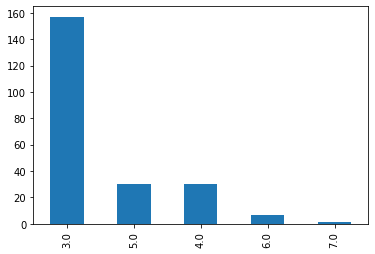

In [25]:
#number of times super raid exist 
df_events.loc[df_events['super_raid'],'raid_points'].value_counts().plot(kind = 'bar')

In [26]:
#suppose the scenerio we want to see who is the raider when there is 7 points raid:
super_raid_7 = df_events[(df_events['raid_points']==7.0) & (df_events['super_raid']==True)]
super_raid_7['event_text']

55475    Mahendra Rajput raids successfully
Name: event_text, dtype: object

In [27]:
#sometimes it is required to find out all those events time when super raid was happening, 
#so that we can use this in ads campaing 
df_sub = df_events[df_events['super_raid']]
df_subs=df_sub.sort_values(by = ['raid_points'], ascending = False)
df_subs[['match_id','clock','raid_points']]

,match_id,clock,raid_points
55475,683,03:33,7.0
55758,686,04:47,6.0
11493,1711,12:35,6.0
8146,1659,03:28,6.0
7476,1648,07:05,6.0
...,...,...,...
50025,633,05:40,3.0
50112,634,09:46,3.0
50438,637,00:40,3.0
50443,637,18:52,3.0


In [28]:
df_events['super_tackle'].value_counts()
df_events['defending_points'].value_counts()

False    66119
True       449
Name: super_tackle, dtype: int64

0.0    45168
1.0    11201
2.0     1184
3.0      762
Name: defending_points, dtype: int64

In [30]:
df_sub = df_events[df_events['super_tackle']]
df_sub.sort_values(by = ['defending_points'], ascending = False)
df_sub[['match_id','clock','defending_points']]

,Column1,clock,defender_id,defenders,defending_all_out_points,defending_bonus_points,defending_capture_points,defending_points,defending_team_id,defending_technical_points,...,review.reason.id,review.reason.reason_value,review.review_taken,review.team_id,score,status_id,substituted_by,super_raid,super_tackle,team_id
848,26,08:49,146.0,NaN,0.0,1.0,1.0,2.0,28.0,0.0,...,NaN,NaN,False,0.0,"[6, 7]",2.0,NaN,False,True,NaN
50886,90,02:40,155.0,NaN,0.0,1.0,1.0,2.0,30.0,0.0,...,NaN,NaN,False,0.0,"[30, 25]",3.0,NaN,False,True,NaN
54366,60,15:52,NaN,NaN,0.0,0.0,0.0,2.0,31.0,2.0,...,NaN,NaN,False,0.0,"[23, 32]",3.0,NaN,False,True,NaN
54290,78,03:59,725.0,NaN,0.0,1.0,1.0,2.0,30.0,0.0,...,NaN,NaN,False,0.0,"[27, 33]",3.0,NaN,False,True,NaN
54226,14,12:28,299.0,NaN,0.0,1.0,1.0,2.0,1.0,0.0,...,NaN,NaN,False,0.0,"[7, 6]",2.0,NaN,False,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15033,43,18:18,772.0,NaN,0.0,1.0,1.0,2.0,31.0,0.0,...,NaN,NaN,False,0.0,"[14, 22]",3.0,NaN,False,True,NaN
14943,53,16:22,2291.0,NaN,0.0,1.0,1.0,2.0,7.0,0.0,...,NaN,NaN,False,0.0,"[20, 15]",3.0,NaN,False,True,NaN
14873,73,04:56,42.0,NaN,0.0,1.0,1.0,2.0,28.0,0.0,...,NaN,NaN,False,0.0,"[28, 31]",3.0,NaN,False,True,NaN
14798,100,00:31,2020.0,NaN,0.0,1.0,1.0,2.0,30.0,0.0,...,NaN,NaN,False,0.0,"[36, 27]",3.0,NaN,False,True,NaN


,match_id,clock,defending_points
848,1050,08:49,2.0
879,1050,15:30,2.0
945,1051,18:58,2.0
953,1051,16:55,2.0
7444,1647,02:25,2.0
...,...,...,...
63364,757,06:29,2.0
63421,758,03:28,2.0
63721,760,17:28,2.0
63788,761,08:47,2.0


In [31]:
#Analyze the column associated with analysis
df_events['raid_points'].isna().sum()
df_events['raid_points'] = df_events['raid_points'].fillna(0)

8253

,index,raid_points
0,0.0,44915
1,1.0,17204
2,2.0,2865
3,3.0,1082
4,4.0,399
5,5.0,68
6,-1.0,19
7,6.0,11
8,-20.0,2
9,-8.0,1


<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='index', ylabel='raid_points'>

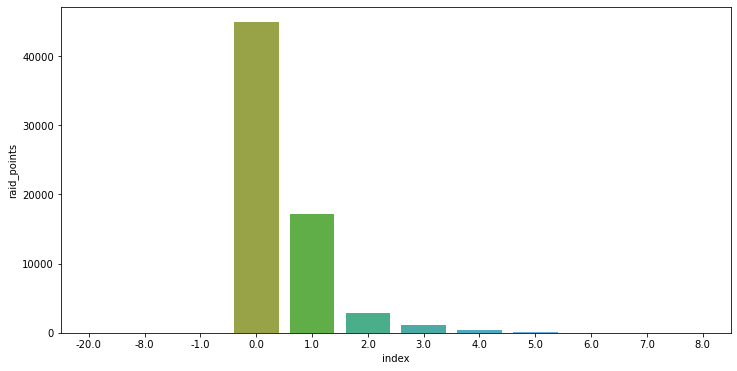

In [32]:
df_subs = df_events['raid_points'].value_counts().reset_index()
df_subs
plt.figure(figsize = (12,6))
sns.barplot(x = df_subs['index'], y = df_subs['raid_points'])


In [33]:
df_events['raid_points'].value_counts()

 0.0     44915
 1.0     17204
 2.0      2865
 3.0      1082
 4.0       399
 5.0        68
-1.0        19
 6.0        11
-20.0        2
-8.0         1
 8.0         1
 7.0         1
Name: raid_points, dtype: int64

In [34]:
#close counter
df_events['score']

0          [0, 1]
1          [0, 1]
2          [1, 2]
3          [1, 3]
4          [1, 3]
           ...   
66563    [30, 15]
66564    [30, 15]
66565    [30, 16]
66566    [30, 17]
66567    [31, 17]
Name: score, Length: 66568, dtype: object

In [35]:
df_events.groupby('match_id')[['event_no','score']].last()
#other way to achieve same task
df_events.groupby('match_id')[['event_no','score']].agg('last')
df_events.groupby('match_id')[['event_no','score']].apply(lambda x:x.iloc[-1])
df_events.groupby('match_id')[['event_no','score']].nth(-1)
# we use this way when we use some column instead of all columns

,event_no,score
match_id,,
1,88,"[45, 31]"
2,86,"[28, 47]"
3,92,"[39, 36]"
4,83,"[36, 25]"
5,84,"[31, 35]"
...,...,...
1767,103,"[25, 51]"
1768,99,"[32, 32]"
1769,88,"[29, 26]"


,event_no,score
match_id,,
1,88,"[45, 31]"
2,86,"[28, 47]"
3,92,"[39, 36]"
4,83,"[36, 25]"
5,84,"[31, 35]"
...,...,...
1767,103,"[25, 51]"
1768,99,"[32, 32]"
1769,88,"[29, 26]"


,event_no,score
match_id,,
1,88,"[45, 31]"
2,86,"[28, 47]"
3,92,"[39, 36]"
4,83,"[36, 25]"
5,84,"[31, 35]"
...,...,...
1767,103,"[25, 51]"
1768,99,"[32, 32]"
1769,88,"[29, 26]"


,event_no,score
match_id,,
1,88,"[45, 31]"
2,86,"[28, 47]"
3,92,"[39, 36]"
4,83,"[36, 25]"
5,84,"[31, 35]"
...,...,...
1767,103,"[25, 51]"
1768,99,"[32, 32]"
1769,88,"[29, 26]"


In [38]:
#we use this way when we have to pick all the columns 
#window function to get count of each group i.e. for match_id 1-0,1,2,3,4.....
df_events['count'] = df_events.groupby('match_id').cumcount()
#pick the index of each group where max count is located
idx = df_events.groupby('match_id')['count'].idxmax()
#pick the rows shortlisted above
df_sub = df_events.loc[idx,:]
df_sub
df_sub['score'].isna().sum()

,Column1,clock,defender_id,defenders,defending_all_out_points,defending_bonus_points,defending_capture_points,defending_points,defending_team_id,defending_technical_points,...,review.reason.reason_value,review.review_taken,review.team_id,score,status_id,substituted_by,super_raid,super_tackle,team_id,count
92,92,40:29,NaN,NaN,NaN,NaN,NaN,0.0,5.0,NaN,...,NaN,NaN,NaN,"[45, 31]",0.0,NaN,False,False,NaN,92
20168,85,40:13,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,...,NaN,NaN,NaN,"[28, 47]",0.0,NaN,False,False,NaN,85
30942,92,40:4,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,...,NaN,NaN,NaN,"[39, 36]",0.0,NaN,False,False,NaN,92
42265,83,39:41,94.0,NaN,NaN,NaN,NaN,1.0,5.0,NaN,...,NaN,NaN,NaN,"[36, 25]",0.0,NaN,False,False,NaN,83
45784,86,39:41,NaN,NaN,NaN,NaN,NaN,0.0,7.0,NaN,...,NaN,NaN,NaN,"[31, 35]",0.0,NaN,False,False,NaN,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17346,102,00:05,NaN,NaN,0.0,0.0,0.0,0.0,29.0,0.0,...,NaN,False,0.0,"[25, 51]",3.0,NaN,False,False,NaN,102
17445,98,00:00,NaN,NaN,0.0,0.0,0.0,0.0,28.0,0.0,...,NaN,False,0.0,"[32, 32]",3.0,NaN,False,False,NaN,98
17533,87,00:16,NaN,NaN,0.0,0.0,0.0,0.0,5.0,0.0,...,NaN,False,0.0,"[29, 26]",3.0,NaN,False,False,NaN,87
17737,103,00:04,NaN,NaN,0.0,0.0,0.0,0.0,3.0,0.0,...,NaN,False,0.0,"[33, 36]",3.0,NaN,False,False,NaN,103


1

In [42]:
#removing the null rows of score column from dataset
df_sub=df_sub.dropna(subset = ['score'])
df_sub['score']

92       [45, 31]
20168    [28, 47]
30942    [39, 36]
42265    [36, 25]
45784    [31, 35]
           ...   
17346    [25, 51]
17445    [32, 32]
17533    [29, 26]
17737    [33, 36]
17828    [27, 41]
Name: score, Length: 683, dtype: object

In [40]:
#here we just extract the score1, score2 from score column, then evaluate the diff between them
ds = df_sub['score'].astype(str).str.replace('[','',regex = False).str.replace(']','',regex = False).str.strip().str.split(',')
df_sub['score1']=ds.str[0].astype(int)
df_sub['score2']=ds.str[1].astype(int)
df_sub['score_diff'] = np.abs(df_sub['score1']-df_sub['score2'])

C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_22668\2798832729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['score1']=ds.str[0].astype(int)
C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_22668\2798832729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['score2']=ds.str[1].astype(int)
C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_22668\2798832729.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [41]:
df_sub[['match_id','score_diff']].sort_values(by='score_diff')

,match_id,score_diff
35896,343,0
31512,304,0
32295,311,0
32687,315,0
54504,674,0
...,...,...
28965,281,53
27725,270,54
28336,276,55
46928,567,56


In [43]:
#suppose we want to see the matches which are close but not draw...
df_sub.loc[df_sub['score_diff']!=0,['match_id','score_diff']].sort_values(by = ['score_diff']).head(10)

,match_id,score_diff
25360,249,1
32894,317,1
52113,651,1
18533,184,1
18444,183,1
2308,117,1
2428,118,1
40804,387,1
40702,386,1
12364,172,1


In [45]:
#unpacking method
#['name'].apply(list) takes all team names for each match and combines them into a list.
#Why reset_index() is used:
#By calling .reset_index(), you:
#Convert the match_id index into a normal column
#Turn the result into a proper DataFrame
df_task = df_team.groupby('match_id')['name'].apply(list).reset_index()
df_task
#df_task['name'].tolist() converts the list column to a list of lists
#pd.DataFrame(..., index=...) converts it to a new DataFrame with two columns
df_task[['team1','team2']] = pd.DataFrame(df_task['name'].tolist(), index = df_task.index)

,match_id,name
0,1,"[Jaipur Pink Panthers, U Mumba]"
1,2,"[Bengaluru Bulls, Dabang Delhi K.C.]"
2,3,"[Bengaluru Bulls, Puneri Paltan]"
3,4,"[Bengal Warriors, U Mumba]"
4,5,"[Dabang Delhi K.C., Puneri Paltan]"
...,...,...
679,1767,"[Tamil Thalaivas, Patna Pirates]"
680,1768,"[Haryana Steelers, Jaipur Pink Panthers]"
681,1769,"[Bengal Warriors, U Mumba]"
682,1770,"[Jaipur Pink Panthers, Patna Pirates]"


In [46]:
df_task

,match_id,name,team1,team2
0,1,"[Jaipur Pink Panthers, U Mumba]",Jaipur Pink Panthers,U Mumba
1,2,"[Bengaluru Bulls, Dabang Delhi K.C.]",Bengaluru Bulls,Dabang Delhi K.C.
2,3,"[Bengaluru Bulls, Puneri Paltan]",Bengaluru Bulls,Puneri Paltan
3,4,"[Bengal Warriors, U Mumba]",Bengal Warriors,U Mumba
4,5,"[Dabang Delhi K.C., Puneri Paltan]",Dabang Delhi K.C.,Puneri Paltan
...,...,...,...,...
679,1767,"[Tamil Thalaivas, Patna Pirates]",Tamil Thalaivas,Patna Pirates
680,1768,"[Haryana Steelers, Jaipur Pink Panthers]",Haryana Steelers,Jaipur Pink Panthers
681,1769,"[Bengal Warriors, U Mumba]",Bengal Warriors,U Mumba
682,1770,"[Jaipur Pink Panthers, Patna Pirates]",Jaipur Pink Panthers,Patna Pirates


In [47]:
df_task.drop(columns = 'name',axis = 1,inplace = True)

In [48]:
df_task

,match_id,team1,team2
0,1,Jaipur Pink Panthers,U Mumba
1,2,Bengaluru Bulls,Dabang Delhi K.C.
2,3,Bengaluru Bulls,Puneri Paltan
3,4,Bengal Warriors,U Mumba
4,5,Dabang Delhi K.C.,Puneri Paltan
...,...,...,...
679,1767,Tamil Thalaivas,Patna Pirates
680,1768,Haryana Steelers,Jaipur Pink Panthers
681,1769,Bengal Warriors,U Mumba
682,1770,Jaipur Pink Panthers,Patna Pirates


In [50]:
df_teams_name = df_team.groupby('match_id').agg(team1 = ('name','first'), team2 = ('name','last')).reset_index()
df_teams_name

,match_id,team1,team2
0,1,Jaipur Pink Panthers,U Mumba
1,2,Bengaluru Bulls,Dabang Delhi K.C.
2,3,Bengaluru Bulls,Puneri Paltan
3,4,Bengal Warriors,U Mumba
4,5,Dabang Delhi K.C.,Puneri Paltan
...,...,...,...
679,1767,Tamil Thalaivas,Patna Pirates
680,1768,Haryana Steelers,Jaipur Pink Panthers
681,1769,Bengal Warriors,U Mumba
682,1770,Jaipur Pink Panthers,Patna Pirates


In [ ]:
df_teams_name

In [51]:
df_sub1 = df_sub[['match_id','score_diff']].sort_values(by='score_diff').head(10)
df_sub1.merge(df_teams_name, on='match_id', how = 'left')
df_sub2 = df_sub.loc[df_sub['score_diff']!=0,['match_id','score_diff']].sort_values(by = ['score_diff']).head(10)
df_sub2.merge(df_teams_name, on='match_id', how = 'left')

,match_id,score_diff,team1,team2
0,343,0,Bengal Warriors,U.P. Yoddha
1,304,0,Bengaluru Bulls,Telugu Titans
2,311,0,Patna Pirates,U.P. Yoddha
3,315,0,Haryana Steelers,Tamil Thalaivas
4,674,0,U.P. Yoddha,Bengal Warriors
5,318,0,Gujarat Fortunegiants,Bengal Warriors
6,676,0,U.P. Yoddha,Telugu Titans
7,90,0,Telugu Titans,Jaipur Pink Panthers
8,89,0,Patna Pirates,Bengal Warriors
9,103,0,Dabang Delhi,Telugu Titans


,match_id,score_diff,team1,team2
0,249,1,Storm Queens,Fire Birds
1,317,1,Dabang Delhi K.C.,Tamil Thalaivas
2,651,1,Puneri Paltan,U Mumba
3,184,1,Bengaluru Bulls,Bengal Warriors
4,183,1,U Mumba,Jaipur Pink Panthers
5,117,1,Puneri Paltan,Bengaluru Bulls
6,118,1,Telugu Titans,Bengaluru Bulls
7,387,1,Puneri Paltan,U.P. Yoddha
8,386,1,Gujarat Fortunegiants,Patna Pirates
9,172,1,Telugu Titans,Patna Pirates


<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='score1', ylabel='Count'>

0

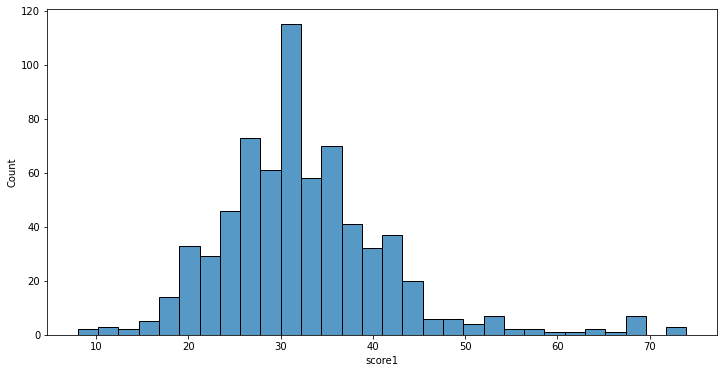

In [52]:
#Univariate Analysis
plt.figure(figsize = (12,6))
sns.histplot(df_sub['score1'])
df_sub['score1'].isna().sum()

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='score2', ylabel='Count'>

0

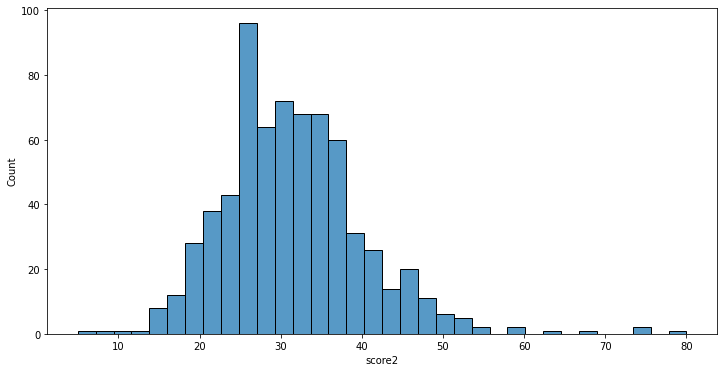

In [53]:
plt.figure(figsize=(12,6))
sns.histplot(df_sub['score2'])
df_sub['score2'].isnull().sum()

In [54]:
df_sub[['match_id','score_diff','score1','score2']].sort_values(by = ['score_diff','score1','score2'], ascending =[True,False,False])

,match_id,score_diff,score1,score2
599,103,0,45,45
36931,352,0,41,41
52010,650,0,40,40
61935,743,0,40,40
62805,751,0,40,40
...,...,...,...,...
28965,281,53,73,20
27725,270,54,74,20
28336,276,55,19,74
46928,567,56,72,16


In [ ]:
#top competing teams

In [55]:
df_winner = df_team.groupby('match_id').agg(team1 = ('name','first'),team2 = ('name','last'),team1_score = ('score','first'),team2_score=('score','last'))
df_winner
#np.where() is a NumPy function that is often used for vectorized conditional logic — essentially, 
#it's a faster alternative to apply() with lambda, especially on large datasets.
#np.where(condition, value_if_true, value_if_false)
df_winner['winner'] = np.where(df_winner['team1_score']>df_winner['team2_score'],df_winner['team1'],np.where(df_winner['team1_score']<df_winner['team2_score'],df_winner['team2'],'Draw'))

In [ ]:
#df_winner['winner_team'] = df_winner.apply(
#    lambda row: row['team1'] if row['team1_score'] > row['team2_score']
#    else row['team2'] if row['team2_score'] > row['team1_score']
#    else 'Draw',
#    axis=1
#)

In [56]:
df_winner.reset_index(inplace = True)

U Mumba                  76
Patna Pirates            67
Draw                     59
Bengaluru Bulls          57
Telugu Titans            52
Jaipur Pink Panthers     52
Bengal Warriors          52
Puneri Paltan            46
Gujarat Fortunegiants    39
Dabang Delhi K.C.        36
Haryana Steelers         28
U.P. Yoddha              27
Tamil Thalaivas          15
India                    14
Iran                     12
Republic of Korea         7
Dabang Delhi              5
Thailand                  4
Diler Delhi               3
Bangladesh                3
Kenya                     3
Storm Queens              3
India Women               2
Chennai Challengers       2
Pakistan                  2
Japan                     2
Poland                    2
England                   2
Ice Divas                 2
Services SCB              1
Services SSCB             1
Haryana                   1
Australia                 1
Fire Birds                1
Iran Women                1
Fire birds          

<Figure size 864x432 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='winner', ylabel='winner'>

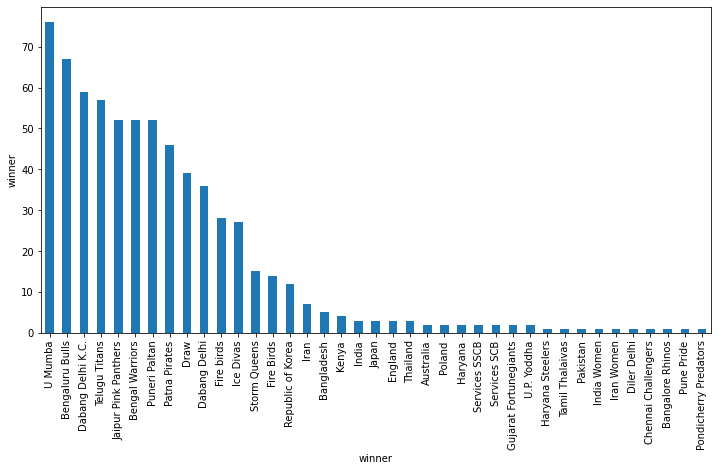

In [58]:
#find the team which have won most number of times
df_winner['winner'].value_counts()
plt.figure(figsize = (12,6))
df_winner['winner'].value_counts().plot.bar()
sns.barplot(x=df_winner['winner'],y=df_winner['winner'].value_counts())

In [59]:
#we perform the same above analysis via different approach
df_winn = df_matches['result'].str.strip().str.split('beat').str[0]
df_winn

0                   U Mumba 
1           Bengal Warriors 
2              Dabang Delhi 
3      Jaipur Pink Panthers 
4      Jaipur Pink Panthers 
               ...          
679    Jaipur Pink Panthers 
680               Match Tied
681         Bengal Warriors 
682           Patna Pirates 
683                 U Mumba 
Name: result, Length: 684, dtype: object

<Figure size 864x432 with 0 Axes>

<AxesSubplot:>

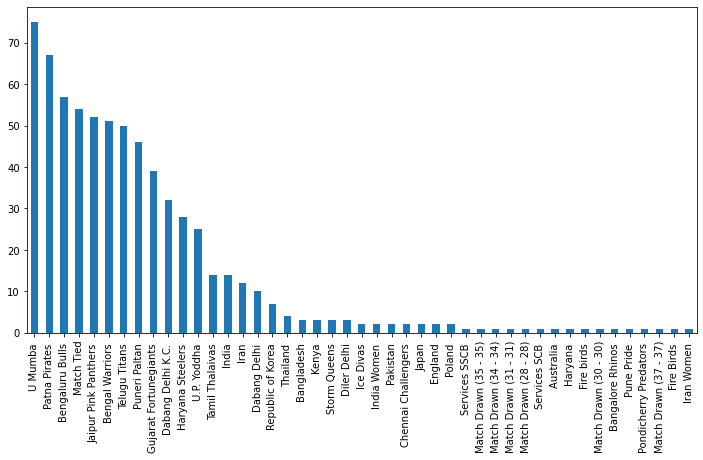

In [60]:
plt.figure(figsize = (12,6))
df_winn.value_counts().plot.bar()

In [61]:
#let's see the id and its corresponding name
df_team[['id','name']].drop_duplicates().sort_values(by='id')

,id,name
12,1,Bengaluru Bulls
2,2,Dabang Delhi K.C.
4,2,Dabang Delhi
0,3,Jaipur Pink Panthers
3,4,Bengal Warriors
1,5,U Mumba
5,6,Patna Pirates
9,7,Puneri Paltan
11,8,Telugu Titans
525,9,Fire Birds


In [63]:
win_counts = df_winner['winner'].value_counts().reset_index()
win_counts

,index,winner
0,U Mumba,76
1,Patna Pirates,67
2,Draw,59
3,Bengaluru Bulls,57
4,Telugu Titans,52
5,Jaipur Pink Panthers,52
6,Bengal Warriors,52
7,Puneri Paltan,46
8,Gujarat Fortunegiants,39
9,Dabang Delhi K.C.,36


In [64]:
win_counts.columns = ['team','win_count']

In [65]:
top_team = win_counts.nlargest(2,'win_count')['team']
top_team

0          U Mumba
1    Patna Pirates
Name: team, dtype: object

In [66]:
#in between top two teams which is winning team most of the time
df_winner[df_winner['team1'].isin(top_team) & df_winner['team2'].isin(top_team) ]['winner'].value_counts()

U Mumba          8
Patna Pirates    4
Draw             1
Name: winner, dtype: int64

In [67]:
df_winner

,match_id,team1,team2,team1_score,team2_score,winner
0,1,Jaipur Pink Panthers,U Mumba,28,44,U Mumba
1,2,Bengaluru Bulls,Dabang Delhi K.C.,42,28,Bengaluru Bulls
2,3,Bengaluru Bulls,Puneri Paltan,39,34,Bengaluru Bulls
3,4,Bengal Warriors,U Mumba,24,35,U Mumba
4,5,Dabang Delhi K.C.,Puneri Paltan,35,31,Dabang Delhi K.C.
...,...,...,...,...,...,...
679,1767,Tamil Thalaivas,Patna Pirates,25,51,Patna Pirates
680,1768,Haryana Steelers,Jaipur Pink Panthers,32,32,Draw
681,1769,Bengal Warriors,U Mumba,29,26,Bengal Warriors
682,1770,Jaipur Pink Panthers,Patna Pirates,33,36,Patna Pirates


In [ ]:
team1_counts = df_winner['team1'].value_counts()
team2_counts = df_winner['team2'].value_counts()

In [ ]:
#Why fill_value=0 is used:
#When you use .add() on two Pandas Series, it aligns values by index (i.e., by team name here).
#But what if a team appears only in team1 or only in team2?
#Then, in one of the Series, that team is missing — which would normally result in NaN during addition.
matches_played = team1_counts.add(team2_counts,fill_value=0)
matches_played = matches_played.sort_values(ascending = False) 
matches_played

In [ ]:
win_count = df_winner['winner'].value_counts()
win_count

In [ ]:
summary_df = pd.concat([matches_played,win_count],axis = 1)
summary_df.columns = ['matches_played','win_count']
summary_df['win_rate'] = (summary_df['win_count']/summary_df['matches_played'] )*100
summary_df

In [ ]:
df_team.groupby('name').agg(no_matches = ('match_id','nunique')).reset_index()

In [3]:
#making the new column in matches table of match winner team name
df_matches['name'] = df_matches['result'].str.split('beat').str[0].str.strip()
#count how many times each team won
df_team_match_win = df_matches.groupby('name').agg(n_matches_win = ('match_id','count')).reset_index()
#count how many times team is playing
df_team_match_count = df_team.groupby('name').agg(n_matches_count = ('match_id','nunique')).reset_index()
#merge the two info
df_team_match_perf = df_team_match_count.merge(df_team_match_win, on = 'name' , how = 'left').fillna(0)
df_team_match_perf['%win'] = df_team_match_perf['n_matches_win']/df_team_match_perf['n_matches_count']
df_team_match_perf

,name,n_matches_count,n_matches_win,%win
0,Argentina,9,0.0,0.000000
1,Australia,5,1.0,0.200000
2,Bangalore Rhinos,2,1.0,0.500000
3,Bangladesh,5,3.0,0.600000
4,Bengal Warriors,120,51.0,0.425000
5,Bengaluru Bulls,121,57.0,0.471074
6,Chennai Challengers,4,2.0,0.500000
7,Chinese Taipei Women,1,0.0,0.000000
8,Dabang Delhi,28,10.0,0.357143
9,Dabang Delhi K.C.,88,32.0,0.363636


In [ ]:
df_team_match_perf[df_team_match_perf['n_matches_win']>=15].sort_values(by = '%win', ascending = False)

In [ ]:
#for all the teams find total_points, total_raid_points, total_tackle_points, % of raid_points
#stats.points.total,stats.points.tackle_points.total,stats.points.raid_points.total,stats.points.all_out
df_team[['stats.points.tackle_points.total','stats.points.raid_points.total','stats.points.all_out','stats.points.total']]

In [ ]:
#for all the teams find total_points, total_raid_points, total_tackle_points, % of raid_points
df_sum = df_team.groupby('name').agg(total_points = ('stats.points.total','sum'),total_raid_points =('stats.points.raid_points.total','sum'),
                           total_tackle_points = ('stats.points.tackle_points.total','sum'),total_all_out_points = ('stats.points.all_out','sum'))
df_sum['%raid_point'] = df_sum['total_raid_points'] / df_sum['total_points']
df_sum[df_sum['total_points']>2000].sort_values(by = '%raid_point', ascending = False)

In [4]:
# For all the teams find total points, total raid points, total tackle points, % of raid points
df_points = df_team.groupby('name').agg(total_raid_points =('stats.points.raid_points.total','sum'),total_tackle_points = ('stats.points.tackle_points.total','sum') , total_points = ('stats.points.total','sum'))
df_team_match_perf = df_team_match_perf.merge(df_points, on = 'name', how = 'left')
df_team_match_perf['points_per_match'] = df_team_match_perf['total_points']/df_team_match_perf['n_matches_count']
df_team_match_perf['raid_points_per_match'] = df_team_match_perf['total_raid_points']/df_team_match_perf['n_matches_count']
df_team_match_perf['tackle_points_per_match'] = df_team_match_perf['total_tackle_points']/df_team_match_perf['n_matches_count']
df_team_match_perf.head()

,name,n_matches_count,n_matches_win,%win,total_raid_points,total_tackle_points,total_points,points_per_match,raid_points_per_match,tackle_points_per_match
0,Argentina,9,0.0,0.000,177,56,253,28.111111,19.666667,6.222222
1,Australia,5,1.0,0.200,88,37,146,29.200000,17.600000,7.400000
2,Bangalore Rhinos,2,1.0,0.500,42,22,78,39.000000,21.000000,11.000000
3,Bangladesh,5,3.0,0.600,145,59,251,50.200000,29.000000,11.800000
4,Bengal Warriors,120,51.0,0.425,2103,1070,3613,30.108333,17.525000,8.916667


In [7]:
#find the top raiding teams
df_team_match_perf = df_team_match_perf[df_team_match_perf['n_matches_win']>15].sort_values(by = '%win', ascending = False) 

In [10]:
#find the top raiding teams
df_team_match_perf.sort_values(by = 'raid_points_per_match', ascending = False).head(5)

,name,n_matches_count,n_matches_win,%win,total_raid_points,total_tackle_points,total_points,points_per_match,raid_points_per_match,tackle_points_per_match
31,Patna Pirates,129,67.0,0.519380,2532,1276,4370,33.875969,19.627907,9.891473
17,Haryana Steelers,60,28.0,0.466667,1127,577,1933,32.216667,18.783333,9.616667
9,Dabang Delhi K.C.,88,32.0,0.363636,1628,784,2790,31.704545,18.500000,8.909091
43,Telugu Titans,120,50.0,0.416667,2217,1147,3822,31.850000,18.475000,9.558333
5,Bengaluru Bulls,121,57.0,0.471074,2186,1142,3808,31.471074,18.066116,9.438017


In [11]:
#find the top tackle teams
df_team_match_perf.sort_values(by = 'tackle_points_per_match', ascending = False).head(5)

,name,n_matches_count,n_matches_win,%win,total_raid_points,total_tackle_points,total_points,points_per_match,raid_points_per_match,tackle_points_per_match
14,Gujarat Fortunegiants,64,39.0,0.609375,1114,678,2080,32.500000,17.406250,10.593750
45,U Mumba,123,75.0,0.609756,2192,1286,3971,32.284553,17.821138,10.455285
35,Puneri Paltan,120,46.0,0.383333,1981,1195,3644,30.366667,16.508333,9.958333
31,Patna Pirates,129,67.0,0.519380,2532,1276,4370,33.875969,19.627907,9.891473
46,U.P. Yoddha,64,25.0,0.390625,1130,621,2000,31.250000,17.656250,9.703125


In [19]:
df_comp = df_winner[(df_winner['team1'].isin(['Patna Pirates','Gujarat Fortunegiants'])) & (df_winner['team2'].isin(['Patna Pirates','Gujarat Fortunegiants']))]

In [21]:
df_comp['winner'].value_counts()

Gujarat Fortunegiants    5
Patna Pirates            1
Name: winner, dtype: int64

In [23]:
#top 5 teams we will analyze the therie performance over the years
df_team_match_perf.head(5)

,name,n_matches_count,n_matches_win,%win,total_raid_points,total_tackle_points,total_points,points_per_match,raid_points_per_match,tackle_points_per_match
45,U Mumba,123,75.0,0.609756,2192,1286,3971,32.284553,17.821138,10.455285
14,Gujarat Fortunegiants,64,39.0,0.609375,1114,678,2080,32.500000,17.406250,10.593750
31,Patna Pirates,129,67.0,0.519380,2532,1276,4370,33.875969,19.627907,9.891473
5,Bengaluru Bulls,121,57.0,0.471074,2186,1142,3808,31.471074,18.066116,9.438017
17,Haryana Steelers,60,28.0,0.466667,1127,577,1933,32.216667,18.783333,9.616667


<Figure size 864x432 with 0 Axes>

C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_19208\3671866680.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['yyyy'] = pd.to_datetime(df_sub['date']).dt.strftime('%Y')


C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_19208\3671866680.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['yyyy'] = pd.to_datetime(df_sub['date']).dt.strftime('%Y')


C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_19208\3671866680.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['yyyy'] = pd.to_datetime(df_sub['date']).dt.strftime('%Y')


C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_19208\3671866680.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['yyyy'] = pd.to_datetime(df_sub['date']).dt.strftime('%Y')


C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_19208\3671866680.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['yyyy'] = pd.to_datetime(df_sub['date']).dt.strftime('%Y')


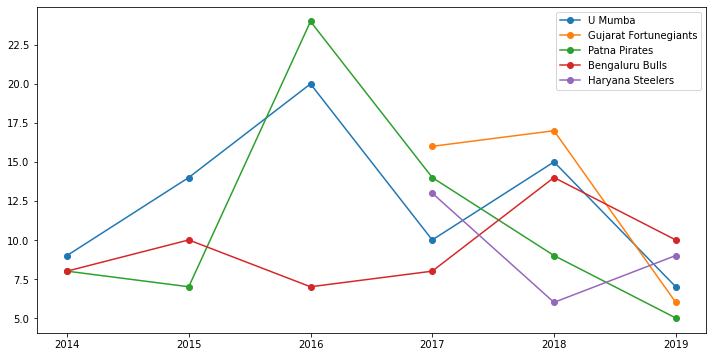

In [45]:
plt.figure(figsize = (12,6))
for team_name in df_team_match_perf['name'].head().tolist():
    df_sub = df_matches[df_matches['name']==team_name]
    df_sub['yyyy'] = pd.to_datetime(df_sub['date']).dt.strftime('%Y')
    df_sub = df_sub.groupby('yyyy').agg(n_wins = ('name','count')).reset_index()
    plt.plot(df_sub['yyyy'],df_sub['n_wins'],marker = 'o')
plt.legend(df_team_match_perf['name'].head().tolist())

In [6]:
df_match_sum = df_team.groupby('match_id').agg(team1 = ('name','first'), team2 = ('name','last'),team1_score = ('score','first'),team2_score = ('score','last'))
df_match_sum

,team1,team2,team1_score,team2_score
match_id,,,,
1,Jaipur Pink Panthers,U Mumba,28,44
2,Bengaluru Bulls,Dabang Delhi K.C.,42,28
3,Bengaluru Bulls,Puneri Paltan,39,34
4,Bengal Warriors,U Mumba,24,35
5,Dabang Delhi K.C.,Puneri Paltan,35,31
...,...,...,...,...
1767,Tamil Thalaivas,Patna Pirates,25,51
1768,Haryana Steelers,Jaipur Pink Panthers,32,32
1769,Bengal Warriors,U Mumba,29,26


In [7]:
df_match_sum['winner'] = np.where(df_match_sum['team1_score']>df_match_sum['team2_score'],df_match_sum['team1'],
         np.where(df_match_sum['team1_score']<df_match_sum['team2_score'],df_match_sum['team2'],'Match Tied'))

In [8]:
df_match_sum

,team1,team2,team1_score,team2_score,winner
match_id,,,,,
1,Jaipur Pink Panthers,U Mumba,28,44,U Mumba
2,Bengaluru Bulls,Dabang Delhi K.C.,42,28,Bengaluru Bulls
3,Bengaluru Bulls,Puneri Paltan,39,34,Bengaluru Bulls
4,Bengal Warriors,U Mumba,24,35,U Mumba
5,Dabang Delhi K.C.,Puneri Paltan,35,31,Dabang Delhi K.C.
...,...,...,...,...,...
1767,Tamil Thalaivas,Patna Pirates,25,51,Patna Pirates
1768,Haryana Steelers,Jaipur Pink Panthers,32,32,Match Tied
1769,Bengal Warriors,U Mumba,29,26,Bengal Warriors


In [ ]:
# We are one of the teams - 
# Performance against other teams 
# Top raiding teams and top tackle teams
# Best raiders
# Best tackle players
# Your best player vs other best players
# Home team advantage

In [12]:
df_jaipur = df_match_sum[df_match_sum['team1'].isin(['Jaipur Pink Panthers']) | df_match_sum['team2'].isin(['Jaipur Pink Panthers'])] 

In [13]:
df_jaipur['winner'].value_counts()

Jaipur Pink Panthers     52
U Mumba                  10
Match Tied               10
Patna Pirates             9
Bengal Warriors           7
Telugu Titans             6
Dabang Delhi K.C.         6
Bengaluru Bulls           5
Puneri Paltan             5
Gujarat Fortunegiants     5
Haryana Steelers          2
U.P. Yoddha               2
Dabang Delhi              1
Name: winner, dtype: int64

In [15]:
df_jaipur['opponent'] = df_jaipur.apply(lambda row : row['team1'] if row['team2']=='Jaipur Pink Panthers' else row['team2'],
                                       axis = 1)

C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_1868\2811724779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jaipur['opponent'] = df_jaipur.apply(lambda row : row['team1'] if row['team2']=='Jaipur Pink Panthers' else row['team2'],


In [16]:
df_jaipur

,team1,team2,team1_score,team2_score,winner,opponent
match_id,,,,,,
1,Jaipur Pink Panthers,U Mumba,28,44,U Mumba,U Mumba
9,Jaipur Pink Panthers,Telugu Titans,46,31,Jaipur Pink Panthers,Telugu Titans
13,Jaipur Pink Panthers,Patna Pirates,35,18,Jaipur Pink Panthers,Patna Pirates
20,Dabang Delhi K.C.,Jaipur Pink Panthers,29,36,Jaipur Pink Panthers,Dabang Delhi K.C.
25,Jaipur Pink Panthers,Telugu Titans,48,29,Jaipur Pink Panthers,Telugu Titans
...,...,...,...,...,...,...
1742,Jaipur Pink Panthers,Bengaluru Bulls,30,41,Bengaluru Bulls,Bengaluru Bulls
1752,U Mumba,Jaipur Pink Panthers,47,21,U Mumba,U Mumba
1757,Jaipur Pink Panthers,Dabang Delhi K.C.,44,46,Dabang Delhi K.C.,Dabang Delhi K.C.


In [18]:
df_jaipur['result'] = df_jaipur.apply(lambda row : 'Win' if row['winner'] == 'Jaipur Pink Panthers' else 'Loss',
                                     axis = 1)
df_jaipur

C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_1868\3902323199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jaipur['result'] = df_jaipur.apply(lambda row : 'Win' if row['winner'] == 'Jaipur Pink Panthers' else 'Loss',


,team1,team2,team1_score,team2_score,winner,opponent,result
match_id,,,,,,,
1,Jaipur Pink Panthers,U Mumba,28,44,U Mumba,U Mumba,Loss
9,Jaipur Pink Panthers,Telugu Titans,46,31,Jaipur Pink Panthers,Telugu Titans,Win
13,Jaipur Pink Panthers,Patna Pirates,35,18,Jaipur Pink Panthers,Patna Pirates,Win
20,Dabang Delhi K.C.,Jaipur Pink Panthers,29,36,Jaipur Pink Panthers,Dabang Delhi K.C.,Win
25,Jaipur Pink Panthers,Telugu Titans,48,29,Jaipur Pink Panthers,Telugu Titans,Win
...,...,...,...,...,...,...,...
1742,Jaipur Pink Panthers,Bengaluru Bulls,30,41,Bengaluru Bulls,Bengaluru Bulls,Loss
1752,U Mumba,Jaipur Pink Panthers,47,21,U Mumba,U Mumba,Loss
1757,Jaipur Pink Panthers,Dabang Delhi K.C.,44,46,Dabang Delhi K.C.,Dabang Delhi K.C.,Loss


In [19]:
df_jaipur['point_scored'] = df_jaipur.apply(lambda row : row['team1_score'] if row['team1']=='Jaipur Pink Panthers' 
                                            else row['team2_score'], axis = 1)
df_jaipur['point_conceded'] = df_jaipur.apply(lambda row : row['team2_score'] if row['team1']=='Jaipur Pink Panthers' 
                                            else row['team1_score'], axis = 1)
df_jaipur

C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_1868\2173715537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jaipur['point_scored'] = df_jaipur.apply(lambda row : row['team1_score'] if row['team1']=='Jaipur Pink Panthers'
C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_1868\2173715537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jaipur['point_conceded'] = df_jaipur.apply(lambda row : row['team2_score'] if row['team1']=='Jaipur Pink Panthers'


,team1,team2,team1_score,team2_score,winner,opponent,result,point_scored,point_conceded
match_id,,,,,,,,,
1,Jaipur Pink Panthers,U Mumba,28,44,U Mumba,U Mumba,Loss,28,44
9,Jaipur Pink Panthers,Telugu Titans,46,31,Jaipur Pink Panthers,Telugu Titans,Win,46,31
13,Jaipur Pink Panthers,Patna Pirates,35,18,Jaipur Pink Panthers,Patna Pirates,Win,35,18
20,Dabang Delhi K.C.,Jaipur Pink Panthers,29,36,Jaipur Pink Panthers,Dabang Delhi K.C.,Win,36,29
25,Jaipur Pink Panthers,Telugu Titans,48,29,Jaipur Pink Panthers,Telugu Titans,Win,48,29
...,...,...,...,...,...,...,...,...,...
1742,Jaipur Pink Panthers,Bengaluru Bulls,30,41,Bengaluru Bulls,Bengaluru Bulls,Loss,30,41
1752,U Mumba,Jaipur Pink Panthers,47,21,U Mumba,U Mumba,Loss,21,47
1757,Jaipur Pink Panthers,Dabang Delhi K.C.,44,46,Dabang Delhi K.C.,Dabang Delhi K.C.,Loss,44,46


In [22]:
df_jaipur.reset_index(inplace = True)

In [33]:
jaipur_sum = df_jaipur.groupby('opponent').agg(matches_played = ('match_id', 'count'),
                                  Wins = ('result', lambda x : (x == 'Win').sum()),
                                  Losses = ('result', lambda x : (x == 'Loss').sum()),
                                  Total_points_scored = ('point_scored','sum'),
                                  Total_points_conceded = ('point_conceded','sum'),
                                  avg_point_diff = ('point_scored', lambda x : (x-df_jaipur.loc[x.index,'point_conceded']).mean())).reset_index()
jaipur_sum['win_percent'] = round((jaipur_sum['Wins']/jaipur_sum['matches_played']) * 100, 2)
jaipur_sum.sort_values(by = 'win_percent')


,opponent,matches_played,Wins,Losses,Total_points_scored,Total_points_conceded,avg_point_diff,win_percent
4,Gujarat Fortunegiants,7,2,5,181,203,-3.142857,28.57
10,U Mumba,18,6,12,529,573,-2.444444,33.33
6,Patna Pirates,14,5,9,400,442,-3.000000,35.71
0,Bengal Warriors,11,4,7,326,350,-2.181818,36.36
3,Dabang Delhi K.C.,12,5,7,415,403,1.000000,41.67
9,Telugu Titans,12,5,7,381,369,1.000000,41.67
1,Bengaluru Bulls,12,6,6,359,368,-0.750000,50.00
2,Dabang Delhi,4,2,2,138,111,6.750000,50.00
5,Haryana Steelers,8,4,4,262,242,2.500000,50.00
11,U.P. Yoddha,4,2,2,125,134,-2.250000,50.00


In [38]:
player_summ = df_players.groupby(['player_id','player_name']).agg(total_raid_points = ('player_raid_points_total','sum'),
                                                    total_tackle_points = ('player_tackle_points_total','sum'),
                                                    total_points = ('player_total_points','sum')).reset_index()

In [52]:
#top raider
top_raider = player_summ.sort_values(by = 'total_raid_points', ascending = False).head(5)
top_raider

,player_id,player_name,total_raid_points,total_tackle_points,total_points
171,197,Pardeep Narwal,1115,10,1125
73,81,Rahul Chaudhari,986,96,1082
25,26,Ajay Thakur,913,86,999
301,326,Rohit Kumar,659,39,698
110,143,Maninder Singh,647,46,693


In [40]:
#top defender
player_summ.sort_values(by = 'total_tackle_points', ascending = False).head(5)

,player_id,player_name,total_raid_points,total_tackle_points,total_points
62,69,Manjeet Chhillar,224,362,586
109,142,Sandeep Narwal,256,317,573
240,259,Fazel Atrachali,12,311,323
64,71,Mohit Chhillar,7,265,272
129,157,Ravinder Pahal,13,264,277


In [46]:
#top alrounder
player_summ[(player_summ['total_raid_points']>500) & (player_summ['total_tackle_points']>70)]

,player_id,player_name,total_raid_points,total_tackle_points,total_points
25,26,Ajay Thakur,913,86,999
30,29,Anup Kumar,560,107,667
56,58,Kashiling Adake,562,85,647
73,81,Rahul Chaudhari,986,96,1082
81,94,Rishank Devadiga,615,76,691


In [50]:
#how top raiders performing against Gujarat Fortunegiants
df


,match_id,team1,team2,team1_score,team2_score,winner,opponent,result,point_scored,point_conceded
0,1,Jaipur Pink Panthers,U Mumba,28,44,U Mumba,U Mumba,Loss,28,44
1,9,Jaipur Pink Panthers,Telugu Titans,46,31,Jaipur Pink Panthers,Telugu Titans,Win,46,31
2,13,Jaipur Pink Panthers,Patna Pirates,35,18,Jaipur Pink Panthers,Patna Pirates,Win,35,18
3,20,Dabang Delhi K.C.,Jaipur Pink Panthers,29,36,Jaipur Pink Panthers,Dabang Delhi K.C.,Win,36,29
4,25,Jaipur Pink Panthers,Telugu Titans,48,29,Jaipur Pink Panthers,Telugu Titans,Win,48,29


,Unnamed: 0,index,player_id,player_name,player_short_name,player_skill,player_role,player_red_card,player_yellow_card,player_green_card,...,player_tackle_points_capture_bonus,player_raids_total,player_raids_successful,player_raids_unsuccessful,player_raids_Empty,player_tackles_total,player_tackles_successful,player_tackles_unsuccessful,match_id,team_id
0,0,0,15,Sanjay Shrestha,Sanjay Shrestha,NaN,NaN,False,False,False,...,0,0,0,0,0,0,0,0,1,3
1,0,0,96,Rohit Rana,Rohit Rana,NaN,NaN,False,False,False,...,0,1,0,0,1,0,0,0,1,3
2,0,0,72,Navneet Gautam,Navneet Gautam,NaN,NaN,False,False,False,...,0,1,0,0,1,0,0,0,1,3
3,0,0,52,Jasvir Singh,Jasvir Singh,NaN,NaN,False,False,False,...,1,12,7,3,2,10,3,7,1,3
4,0,0,22,Wei Yang,Wei Yang,NaN,NaN,False,False,False,...,0,0,0,0,0,0,0,0,1,3


In [54]:
df_players.groupby(['player_id','player_name',]).agg(total_raid_points = ('player_raid_points_total','sum'),
                                                    total_tackle_points = ('player_tackle_points_total','sum'),
                                                    total_points = ('player_total_points','sum')).reset_index()

,player_id,player_name,total_raid_points,total_tackle_points,total_points
0,1,Mohammad Ziaur Rahman,0,0,0
1,3,I Ketut Ariana,0,0,0
2,4,Ehsan Zamani Fard,4,4,8
3,5,Farhad Kamal Gharibi,0,0,0
4,6,Jaber Hemati Chonehkhan,0,0,0
...,...,...,...,...,...
968,2670,Saurabh Nandal,1,36,37
969,2671,Naveen Narwal,0,1,1
970,2672,Sumit,0,15,15
971,2682,Amit Kumar,8,0,8
